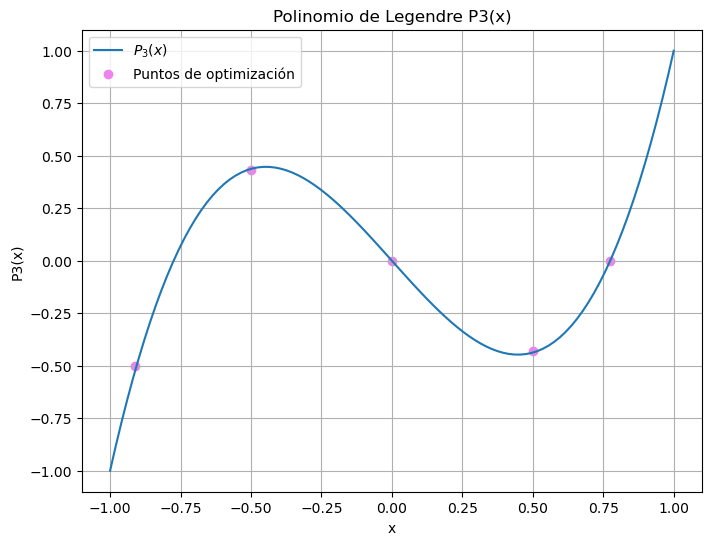

In [63]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#utilizo formula de rodrigues
def legendre_rodrigues(n, x):
    # Símbolo x
    x_sym = sp.Symbol('x')

    base_expr = (x_sym**2 - 1)**n
    
    # Derivadas
    deriv = sp.diff(base_expr, x_sym, n)
    
    # Coeficiente
    coef = 1 / (2**n * sp.factorial(n))

    legendre_poly = coef * deriv
    
    # Evaluar en el valor específico x
    return legendre_poly.subs(x_sym, x)


x_vals = np.linspace(-1, 1,100)


P_3_vals = [legendre_rodrigues(3, x_val) for x_val in x_vals]

roots = []
for i in range(1, 4):
    root = sp.nsolve(legendre_rodrigues(3, sp.Symbol('x')) - 0, i * np.pi / 4)
    roots.append(root)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(x_vals, P_3_vals, label=r"$P_3(x)$")
plt.scatter([roots[0], 0.50, 0, -0.50, -0.91], [0, -0.43, 0, 0.43, -0.50], color='violet', marker='o', label='Puntos de optimización')
plt.xlabel("x")
plt.ylabel("P3(x)")
plt.title("Polinomio de Legendre P3(x)")
plt.grid(True)
plt.legend()
plt.show()


In [73]:
import numpy as np

# Leer datos desde el archivo CSV
data = np.genfromtxt('Datos_3.csv', delimiter=',')

# Separar los datos en la matriz A y el vector b
A = data[:, :-1]
b = data[:, -1]


x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("Matriz de coeficientes A:")
print(A)
print("\nVector de términos independientes b:")
print(b)
print("\nSolución x:")
print(x)

print("\nSistema de ecuaciones lineales resuelto:")
for i in range(A.shape[0]):
    equation = " + ".join([f"{A[i,j]}*x{j}" for j in range(A.shape[1])]) + f" = {b[i]}"
    print(equation)


Matriz de coeficientes A:
[[ 1.  2.]
 [ 2. -1.]
 [ 3.  1.]
 [ 4.  1.]]

Vector de términos independientes b:
[ 1.  1. -1. -2.]

Solución x:
[-0.26086957 -0.02484472]

Sistema de ecuaciones lineales resuelto:
1.0*x0 + 2.0*x1 = 1.0
2.0*x0 + -1.0*x1 = 1.0
3.0*x0 + 1.0*x1 = -1.0
4.0*x0 + 1.0*x1 = -2.0
